In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv(r"C:\Users\DELL\Downloads\Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [3]:
df.shape

(14640, 15)

In [4]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

In [8]:
df['negativereason'].fillna('NoReason', inplace=True)

In [9]:
df['negativereason_confidence'].fillna(df['negativereason_confidence'].median(), inplace=True)

In [10]:
df['tweet_location'].fillna('Unknown', inplace=True)
df['user_timezone'].fillna('Unknown', inplace=True)

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [13]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [14]:
char_to_number_mappingg = {'neutral': 1, 'negative': 0,'positive': 2}

df['airline_sentiment'].replace(char_to_number_mappingg, inplace=True)

In [15]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [16]:
df['negativereason'].value_counts()

NoReason                       5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [17]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NoReason,0.6706,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NoReason,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NoReason,0.6706,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada)


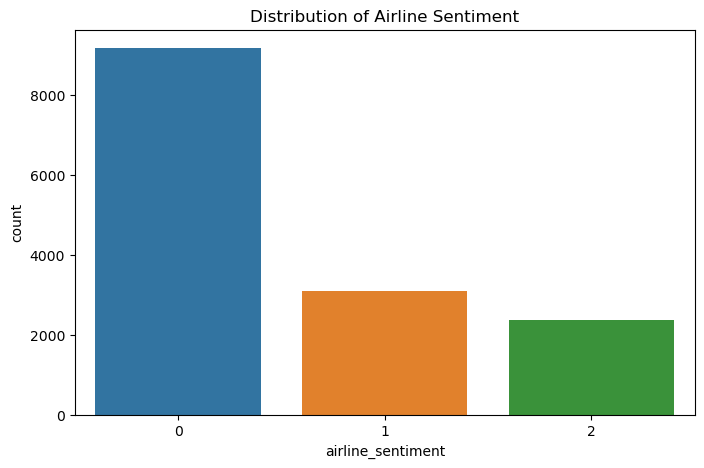

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Airline Sentiment')
plt.show()

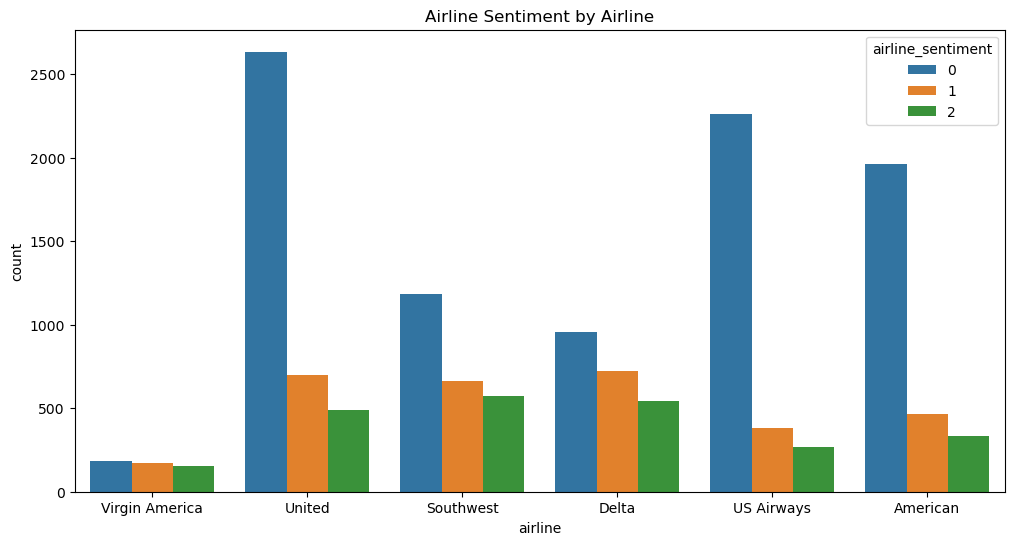

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Airline Sentiment by Airline')
plt.show()

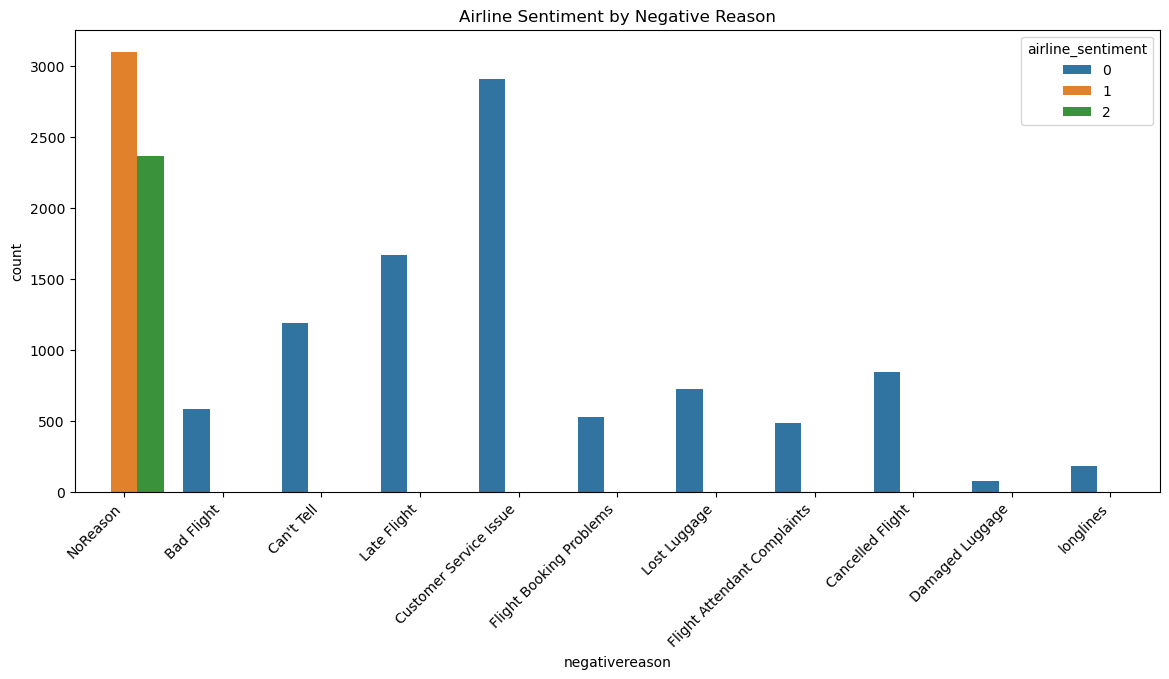

In [21]:
plt.figure(figsize=(14, 6))
sns.countplot(x='negativereason', hue='airline_sentiment', data=df)
plt.title('Airline Sentiment by Negative Reason')
plt.xticks(rotation=45, ha='right')
plt.show()

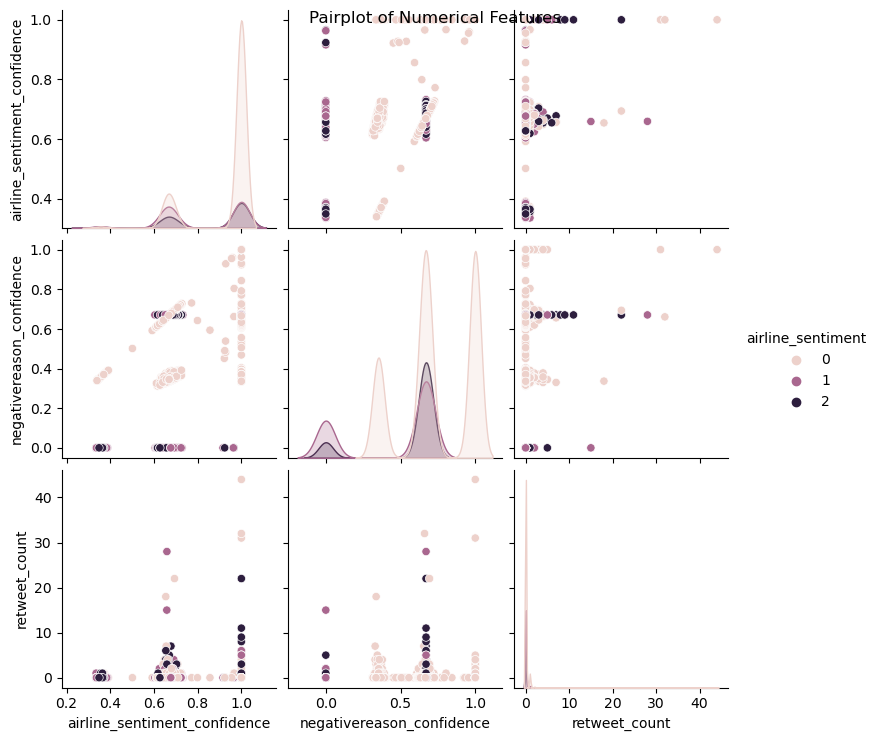

In [22]:
numerical_columns = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']
sns.pairplot(df[numerical_columns + ['airline_sentiment']], hue='airline_sentiment')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [23]:
df_encoded = pd.get_dummies(df, columns=['airline', 'negativereason'], drop_first=True)
df_encoded.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason_confidence', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone', 'airline_Delta',
       'airline_Southwest', 'airline_US Airways', 'airline_United',
       'airline_Virgin America', 'negativereason_Can't Tell',
       'negativereason_Cancelled Flight',
       'negativereason_Customer Service Issue',
       'negativereason_Damaged Luggage',
       'negativereason_Flight Attendant Complaints',
       'negativereason_Flight Booking Problems', 'negativereason_Late Flight',
       'negativereason_Lost Luggage', 'negativereason_NoReason',
       'negativereason_longlines'],
      dtype='object')

**SVM**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


X_a= df_encoded[[ 'airline_Delta', 'airline_Southwest', 'airline_US Airways', 'airline_United', 'airline_Virgin America', "negativereason_Can't Tell", 'negativereason_Cancelled Flight','negativereason_Customer Service Issue','negativereason_Damaged Luggage','negativereason_Flight Attendant Complaints','negativereason_Flight Booking Problems', 'negativereason_Late Flight','negativereason_Lost Luggage', 'negativereason_NoReason','negativereason_longlines', 'airline_sentiment_confidence','negativereason_confidence','retweet_count']]

X_text = df['text'].astype(str)

X = pd.concat([X_text, X_a], axis=1)
y = df_encoded['airline_sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_test_vectorized = vectorizer.transform(X_test['text'])

X_train_vectorized_df = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
X_test_vectorized_df = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

X_train_additional = X_train.drop('text', axis=1).astype(str)
X_test_additional = X_test.drop('text', axis=1).astype(str)

X_train_combined = pd.concat([X_train_vectorized_df, X_train_additional.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test_vectorized_df, X_test_additional.reset_index(drop=True)], axis=1)


In [31]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear' ))
svm_model.fit(X_train_combined, y_train)

y_pred = svm_model.predict(X_test_combined)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.05%


In [33]:
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[1889    0    0]
 [   0  474  106]
 [   0  156  303]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.75      0.82      0.78       580
           2       0.74      0.66      0.70       459

    accuracy                           0.91      2928
   macro avg       0.83      0.83      0.83      2928
weighted avg       0.91      0.91      0.91      2928



**Logistic Regression**

In [117]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_combined, y_train)

y_pred = logreg_model.predict(X_test_combined)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.72%


In [119]:
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[1889    0    0]
 [   0  515   65]
 [   0  119  340]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.81      0.89      0.85       580
           2       0.84      0.74      0.79       459

    accuracy                           0.94      2928
   macro avg       0.88      0.88      0.88      2928
weighted avg       0.94      0.94      0.94      2928



**Gradient Boosting**

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_combined, y_train)

y_pred = gb_model.predict(X_test_combined)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.55%


In [123]:
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[1889    0    0]
 [   0  524   56]
 [   0  162  297]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.76      0.90      0.83       580
           2       0.84      0.65      0.73       459

    accuracy                           0.93      2928
   macro avg       0.87      0.85      0.85      2928
weighted avg       0.93      0.93      0.92      2928



**neural network**

In [124]:
from sklearn.neural_network import MLPClassifier

In [125]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train_combined, y_train)

y_pred = nn_model.predict(X_test_combined)

In [126]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.73%


In [127]:
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[1884    2    3]
 [   0  455  125]
 [   0  112  347]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       0.80      0.78      0.79       580
           2       0.73      0.76      0.74       459

    accuracy                           0.92      2928
   macro avg       0.84      0.85      0.84      2928
weighted avg       0.92      0.92      0.92      2928

